In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb

In [ ]:
import math
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_set/vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
df_cop = df.copy()

In [ ]:
from sklearn.experimental import enable_iterative_imputer

# Importing Iterative Imputer library
from sklearn.impute import IterativeImputer

In [ ]:
df.drop(['id','url','region_url','image_url','VIN','posting_date'], axis=1, inplace=True)
df=df.drop('description',axis=1)

In [ ]:
df=df.drop('size',axis=1)

In [ ]:
df["year"]=df["year"].fillna(df["year"].mean().astype('int'))

odoMean=df['odometer'].mean()
odoMean1=float(round(odoMean))
df["odometer"]=df["odometer"].fillna(odoMean1)

df["lat"]=df["lat"].fillna(df["lat"].mean())
df["long"]=df["long"].fillna(df["long"].mean())

In [ ]:
from sklearn import preprocessing
from tqdm import tqdm
categorical_cols=['region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','type','paint_color', 'state']

In [ ]:
ImputerCheck=df.copy()

Encoder=preprocessing.LabelEncoder()


def Encoding(values):
    NullRemoved = np.array(values.dropna())
    impReshape = NullRemoved.reshape(-1,1)
    impOrdinal = Encoder.fit_transform(impReshape)
    values.loc[values.notnull()] = np.squeeze(impOrdinal)
    return values


for i in tqdm(range(len(categorical_cols))):
    Encoding(ImputerCheck[categorical_cols[i]])

  0%|          | 0/12 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-30-23053e62639a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[values.notnull()] = np.squeeze(impOrdinal)
  8%|▊         | 1/12 [00:00<00:01,  8.48it/s]/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-30-23053e62639a>:10: SettingWithCopyWarning: 


In [ ]:
from sklearn.linear_model import BayesianRidge

In [ ]:
categoricalData=df[categorical_cols]
Encoder=preprocessing.LabelEncoder()

#create a for loop to iterate through each column in the data
for cols in categorical_cols:

    Encoding(categoricalData[cols])
    imputer = IterativeImputer(BayesianRidge())
    DataImpute=imputer.fit_transform(categoricalData[cols].values.reshape(-1, 1))
    DataImpute=DataImpute.astype('int64')
    DataImpute = pd.DataFrame(DataImpute)
    DataImpute =Encoder.inverse_transform(DataImpute.values.reshape(-1, 1))
    categoricalData[cols]=DataImpute

df[categorical_cols]=categoricalData

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-30-23053e62639a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[values.notnull()] = np.squeeze(impOrdinal)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-31-c55aab290d84>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [ ]:
df.isnull().sum()[categorical_cols]

region          0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [ ]:
def OutlierDetection(a,cols):

    x=sorted(a[cols].values.ravel())

    Len_25=25/100*(len(x)+1)
    IP=int(str(Len_25).split(".")[0])
    FP=int(str(Len_25).split(".")[1])
    qua1=x[IP]+FP*(x[IP+1]-x[IP])

    Len_75=75/100*(len(x)+1)
    IP=int(str(Len_75).split(".")[0])
    FP=int(str(Len_75).split(".")[1])
    qua3=x[IP]+FP*(x[IP+1]-x[IP])

    IQR=qua3-qua1
    k=qua1-1.5*IQR
    l=qua3+1.5*IQR
    return (k,l)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


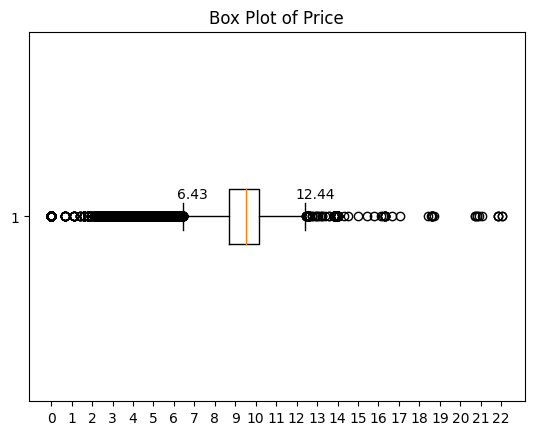

In [ ]:
def PriceMinMax(df):
    res=[]
    qua1,qua3=(df['Price1'].quantile([0.25,0.75]))
    res.append(qua1-1.5*(qua3-qua1))
    res.append(qua3+1.5*(qua3-qua1))
    return (res)

df['Price1'] = np.log(df['price'])
x=df['Price1']

priceRange=list(range(0,int(max(df['Price1']))+1))
redSq = dict(markerfacecolor='g', marker='s')

plt.boxplot(x, vert=False)
plt.xticks(priceRange)
plt.text(PriceMinMax(df)[0]-0.3,1.05,str(round(PriceMinMax(df)[0],2)))
plt.text(PriceMinMax(df)[1]-0.5,1.05,str(round(PriceMinMax(df)[1],2)))
plt.title("Box Plot of Price")
plt.show()

In [ ]:
df_new=df.copy()
out=np.array(['Price1','odometer','year'])
for col in out:
    o1,o2=OutlierDetection(df_new,col)
    df_new=df_new[(df_new[col]>=o1) & (df_new[col]<=o2)]
    print('IQR of',col,'=',o1,o2)
df_new=df_new[df_new['price']!=0]
df_new.drop('Price1',axis=1,inplace=True)

IQR of Price1 = 6.430098455893903 12.43705625322699
IQR of odometer = -107687.5 282172.5
IQR of year = 1994.5 2030.5


In [ ]:
LabelEncoding=preprocessing.LabelEncoder()
df[categorical_cols]=df[categorical_cols].apply(LabelEncoding.fit_transform)

In [ ]:
Normalisation = preprocessing.StandardScaler()
df['price'] = np.log(df['price'])
df['odometer'] = Normalisation.fit_transform(np.array(df['odometer']).reshape(-1,1))
df['year'] = Normalisation.fit_transform(np.array(df['year']).reshape(-1,1))
df['model'] = Normalisation.fit_transform(np.array(df['model']).reshape(-1,1))

#scaling target variable
qua1,qua3=(df['price'].quantile([0.25,0.75]))
Out1=qua1-1.5*(qua3-qua1)
Out2=qua3+1.5*(qua3-qua1)
df=df[(df.price>=Out1) & (df.price<=Out2)]

df['region'] = Normalisation.fit_transform(np.array(df['region']).reshape(-1,1))
df['lat'] = Normalisation.fit_transform(np.array(df['lat']).reshape(-1,1))
df['long'] = Normalisation.fit_transform(np.array(df['long']).reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-40-b571b76cd143>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region'] = Normalisation.fit_transform(np.array(df['region']).reshape(-1,1))
<ipython-input-40-b571b76cd143>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat'] = Normalisation.fit_transform(np.array(df['lat']).reshape(-1,1))
<ipython-input-40-b

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df=df[['region', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state', 'lat', 'long','price']]

In [ ]:
y = df['price'].values.T
X = df.drop('price', axis=1)

In [ ]:
y

array([ 8.69951475,  9.38429368,  9.95227772, ..., 10.46281759,
       10.27470622, 10.32842844])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=0)

In [ ]:
# Define hyperparameters
params = {"objective": "reg:squarederror", "tree_method": "hist", "device":"cuda", "eta":"0.1", "min_child_weight":"0", }


# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=False)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=False)

In [ ]:
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

In [ ]:
n = 100000
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   #nfold=5,
   evals=evals,
   verbose_eval=100,
   early_stopping_rounds=50
)

[0]	train-rmse:0.82548	validation-rmse:0.82273
[100]	train-rmse:0.40688	validation-rmse:0.40942
[200]	train-rmse:0.36817	validation-rmse:0.37938
[300]	train-rmse:0.34619	validation-rmse:0.36315
[400]	train-rmse:0.32967	validation-rmse:0.35175
[500]	train-rmse:0.31695	validation-rmse:0.34345
[600]	train-rmse:0.30589	validation-rmse:0.33682
[700]	train-rmse:0.29736	validation-rmse:0.33224
[800]	train-rmse:0.29023	validation-rmse:0.32871
[900]	train-rmse:0.28344	validation-rmse:0.32531
[1000]	train-rmse:0.27728	validation-rmse:0.32240
[1100]	train-rmse:0.27173	validation-rmse:0.32002
[1200]	train-rmse:0.26648	validation-rmse:0.31756
[1300]	train-rmse:0.26108	validation-rmse:0.31518
[1400]	train-rmse:0.25669	validation-rmse:0.31337
[1500]	train-rmse:0.25191	validation-rmse:0.31145
[1600]	train-rmse:0.24778	validation-rmse:0.31005
[1700]	train-rmse:0.24377	validation-rmse:0.30866
[1800]	train-rmse:0.23993	validation-rmse:0.30731
[1900]	train-rmse:0.23645	validation-rmse:0.30640
[2000]	train

In [ ]:
import pickle
pickle.dump(model, open("/content/drive/MyDrive/data_set/price_prediction.pickle.dat", "wb"))

In [ ]:
loaded_model = pickle.load(open("price_prediction.pickle.dat", "rb"))

In [ ]:
y_pred = loaded_model.predict(xgb.DMatrix(X_test))
predictions = [round(value) for value in y_pred]